In [46]:
from qiskit import QuantumCircuit, transpile
from qiskit.visualization import plot_histogram

from qiskit_aer import AerSimulator

from qiskit_ibm_runtime import QiskitRuntimeService, Session, Sampler

In this small Hello Quantum tutorial we create a [GHZ state](https://en.wikipedia.org/wiki/Greenberger%E2%80%93Horne%E2%80%93Zeilinger_state) with a quantum circuit and sample from it on hardware. To execute the notebook you will need to install [Qiskit](https://github.com/qiskit), [Qiskit Aer](https://github.com/Qiskit/qiskit-aer) and the [IBM Quantum Runtime](https://github.com/Qiskit/qiskit-ibm-runtime). These packages are open source and can be install with `pip instal package-name`. To run on the quantum hardware you will need to setup access to IBM Quantum, see [here](https://docs.quantum.ibm.com/guides/setup-channel#set-up-to-use-ibm-quantum-platform). An additional Hello world tutorial can be found [here](https://docs.quantum.ibm.com/guides/hello-world). 

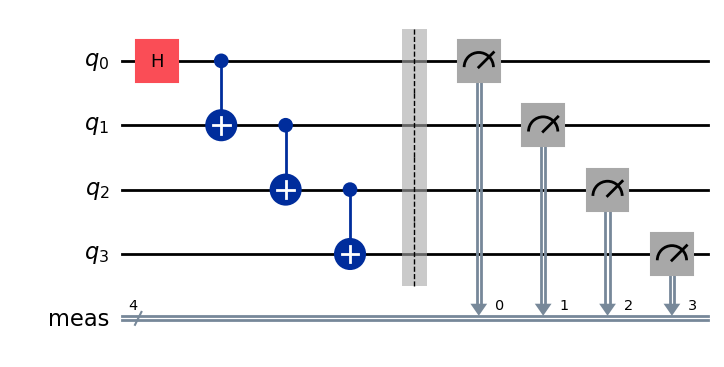

In [66]:
qc = QuantumCircuit(4)
qc.h(0)
qc.cx(0, 1)
qc.cx(1, 2)
qc.cx(2, 3)
qc.measure_all()
qc.draw("mpl")

Run on a simulator of a real device

In [67]:
fake_sampler = Sampler(mode=AerSimulator())

In [68]:
result = fake_sampler.run([qc]).result()

In [69]:
result[0].data.meas.get_counts()

{'0000': 518, '1111': 506}

In [51]:
ideal_counts = result[0].data.meas.get_counts()

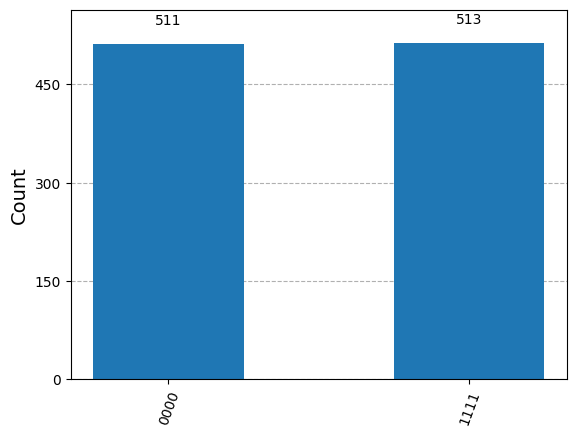

In [52]:
plot_histogram([ideal_counts])

Run on a real backend

In [70]:
service = QiskitRuntimeService(instance="ibm-q/open/main")

backend = service.backend("ibm_sherbrooke")

In [57]:
tqc = transpile(qc, backend, optimization_level=3)

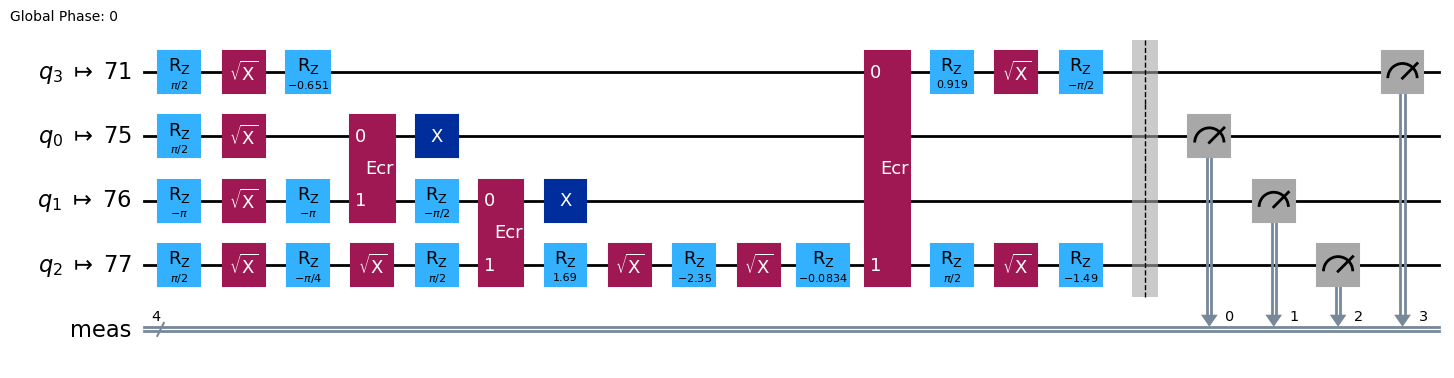

In [58]:
tqc.draw("mpl", idle_wires=False)

In [72]:
sampler = Sampler(mode=backend)

In [73]:
sampler_job = sampler.run([tqc], shots=1024)

In [74]:
sampler_job.job_id()

'cy94zax01rbg008jkvp0'

In [75]:
sampler_job.status()

'DONE'

In [76]:
sampler_job = service.job("cy94zax01rbg008jkvp0")

In [77]:
backend_result = sampler_job.result()

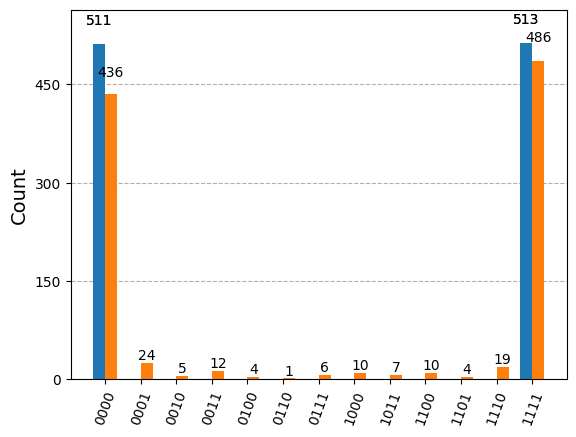

In [78]:
plot_histogram([ideal_counts, backend_result[0].data.meas.get_counts()])